In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/data_kaggle.csv')
df.head(10)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur","RM 2,600,000",5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished
8,"Taman Tun Dr Ismail, Kuala Lumpur","RM 1,950,000",4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished
9,"Sri Petaling, Kuala Lumpur","RM 385,000",3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished


In [55]:
# Clean Price column
df['Price'] = (df['Price']
               .astype(str)
               .str.replace('RM', '', regex=False)
               .str.replace(',', '', regex=False)
               .str.strip())
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Check remaining rows
print("Remaining rows after cleaning:", len(df))
df.head(5)

Remaining rows after cleaning: 53883


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [57]:
# Clean Rooms column
def parse_rooms(x):
    if pd.isna(x):
        return np.nan
    parts = str(x).split('+')
    try:
        return sum(int(p) for p in parts if p.isdigit())
    except:
        return np.nan

df['Rooms_clean'] = df['Rooms'].apply(parse_rooms)

# Check remaining rows
print("Remaining rows after cleaning:", len(df))
df.head(10)

Remaining rows after cleaning: 53883


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Rooms_clean
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,3.0
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,6.0
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,3.0
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,5.0
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6.0
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,5.0
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,5.0
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,3.0


In [59]:
import re
import numpy as np

def extract_size(value):
    if pd.isna(value):
        return np.nan
    s = str(value).replace(',', '').lower()

    # Case 1: patterns like '25x75'
    match = re.findall(r'(\d+\.?\d*)\s*[x×]\s*(\d+\.?\d*)', s)
    if match:
        a, b = map(float, match[0])
        return a * b

    # Case 2: single numeric value (built-up)
    match = re.findall(r'(\d+\.?\d*)', s)
    if match:
        return float(match[0])

    return np.nan

df['Size_sqft'] = df['Size'].apply(extract_size)

# Check remaining rows
print("Remaining rows after cleaning:", len(df))
df.head(20)

Remaining rows after cleaning: 53883


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Rooms_clean,Size_sqft
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,3.0,1335.0
1,"Damansara Heights, Kuala Lumpur",6800000.0,6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished,6.0,6900.0
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,3.0,1875.0
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,5.0,1513.0
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6.0,7200.0
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,5.0,3600.0
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,5.0,1875.0
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,3.0,904.0


In [61]:
# Count how many rows contain at least one missing value
missing_rows = df.isna().any(axis=1).sum()
print("Rows containing at least one NaN value:", missing_rows)

# Drop any row that has NaN in any column
df_final = df.dropna()

# Check how many rows remain after dropping
print("Remaining rows after removing incomplete data:", len(df_final))

# Preview cleaned dataset
df_final.head(20)

Rows containing at least one NaN value: 22023
Remaining rows after removing incomplete data: 31860


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing,Rooms_clean,Size_sqft
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished,3.0,1335.0
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished,3.0,1875.0
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished,5.0,1513.0
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,Partly Furnished,6.0,7200.0
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,Partly Furnished,5.0,3600.0
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,Partly Furnished,5.0,1875.0
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,Partly Furnished,3.0,904.0
13,"Taman Tun Dr Ismail, Kuala Lumpur",4580000.0,6+1,5.0,5.0,Bungalow (Intermediate),Land area : 6000 sq. ft.,Partly Furnished,7.0,6000.0
16,"Bukit Tunku (Kenny Hills), Kuala Lumpur",9000000.0,6+1,7.0,4.0,Bungalow (Corner),Land area : 8500 sq. ft.,Partly Furnished,7.0,8500.0
18,"Mont Kiara, Kuala Lumpur",1780000.0,4+1,4.0,2.0,Condominium (Corner),"Built-up : 1,830 sq. ft.",Partly Furnished,5.0,1830.0


In [63]:
# Count how many unique property types exist
print("Unique property types:", df_final['Property Type'].nunique())

# Show top 15 most common property types
df_final['Property Type'].value_counts().head(15)

Unique property types: 91


Property Type
Condominium                                6840
Condominium (Corner)                       4483
Condominium (Intermediate)                 4100
Serviced Residence                         4003
Serviced Residence (Intermediate)          2433
Serviced Residence (Corner)                1747
2-sty Terrace/Link House (Intermediate)    1162
Bungalow (Intermediate)                     525
Apartment (Intermediate)                    510
Bungalow                                    482
3-sty Terrace/Link House (Intermediate)     446
Semi-detached House (Intermediate)          434
Bungalow (Corner)                           409
Apartment                                   351
Condominium (EndLot)                        320
Name: count, dtype: int64

In [65]:
import numpy as np
import pandas as pd

def simplify_property_type(ptype):
    if pd.isna(ptype):
        return np.nan
    p = str(ptype).lower()

    # Group 1: Condominium family
    if ('condo' in p or 'serviced' in p or 'apartment' in p or 
        'studio' in p or 'penthouse' in p or 'duplex' in p):
        return 'Condominium'

    # Group 2: Terrace / Link House family
    elif ('terrace' in p or 'link' in p or 'townhouse' in p):
        return 'Terrace/Link House'

    # Group 3: Bungalow
    elif 'bungalow' in p:
        return 'Bungalow'

    # Group 4: Semi-Detached
    elif 'semi' in p:
        return 'Semi-Detached'

    # Group 5: Others (rare or commercial types)
    else:
        return 'Others'

# Ensure independent copy
df_final = df_final.copy()

# Create simplified property type column
df_final.loc[:, 'Property_Simplified'] = df_final['Property Type'].apply(simplify_property_type)

print("Unique Property_Simplified types:", df_final['Property_Simplified'].nunique())

# Check counts
print(df_final['Property_Simplified'].value_counts())


Unique Property_Simplified types: 5
Property_Simplified
Condominium           25808
Terrace/Link House     3599
Bungalow               1458
Semi-Detached           862
Others                  133
Name: count, dtype: int64


In [67]:
df_final['Size_sqft'].describe()

count     31860.000000
mean       2155.278151
std        9478.860347
min           0.000000
25%        1001.000000
50%        1325.000000
75%        2000.000000
max      820000.000000
Name: Size_sqft, dtype: float64

In [69]:
# Identify rows with unrealistic sizes (<300 or >10000 sq.ft.)
invalid_sizes = df_final[(df_final['Size_sqft'] < 300) | (df_final['Size_sqft'] > 10000)]
print("Number of unrealistic rows:", len(invalid_sizes))

# Drop unrealistic values
df_final = df_final[(df_final['Size_sqft'] >= 300) & (df_final['Size_sqft'] <= 10000)]
print("Remaining rows after filtering:", len(df_final))

# Confirm cleaned range
print(df_final['Size_sqft'].describe())

Number of unrealistic rows: 561
Remaining rows after filtering: 31299
count    31299.000000
mean      1812.717849
std       1436.737951
min        308.000000
25%       1001.000000
50%       1316.000000
75%       1930.000000
max      10000.000000
Name: Size_sqft, dtype: float64


In [71]:
df_final.head()

# Identify unrealistic price rows
invalid_price = df_final[(df_final['Price'] < 50000) | (df_final['Price'] > 20000000)]
print("Number of unrealistic price rows:", len(invalid_price))

# Drop unrealistic price entries
df_final = df_final[(df_final['Price'] >= 50000) & (df_final['Price'] <= 20000000)]
print("Remaining rows after price filtering:", len(df_final))

# Confirm cleaned range
print(df_final['Price'].describe())

Number of unrealistic price rows: 245
Remaining rows after price filtering: 31054
count    3.105400e+04
mean     1.459817e+06
std      1.596437e+06
min      8.800000e+04
25%      5.650000e+05
50%      9.000000e+05
75%      1.680000e+06
max      1.900000e+07
Name: Price, dtype: float64


In [83]:
# df_final.to_csv('D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/kl_house_clean_final.csv', index=False)
# print("Cleaned dataset aved as: kl_house_clean_final.csv")

Cleaned dataset aved as: kl_house_clean_final.csv


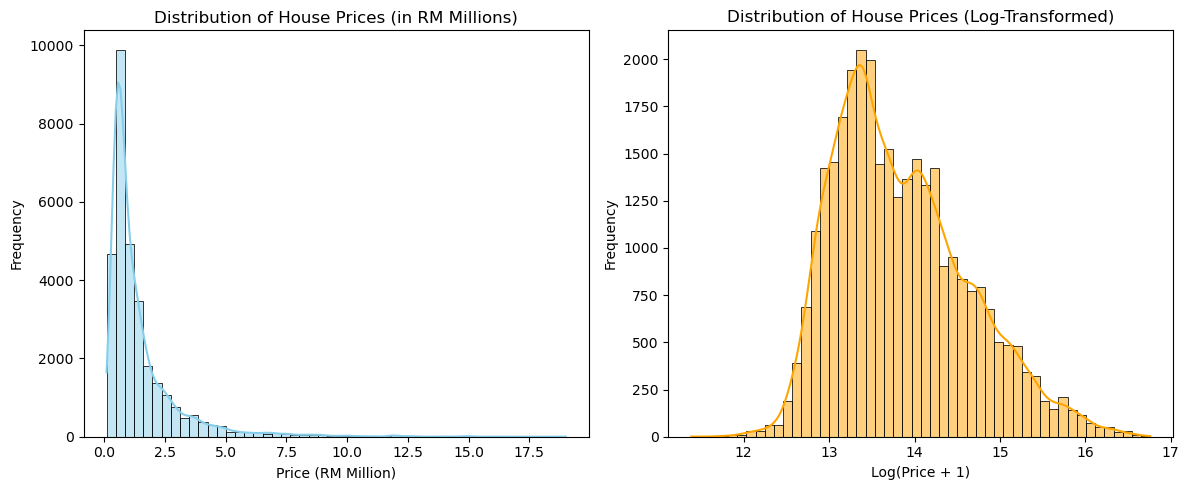

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12,5))
df_final['Price_Million'] = df_final['Price'] / 1_000_000

plt.subplot(1,2,1)
sns.histplot(df_final['Price_Million'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of House Prices (in RM Millions)')
plt.xlabel('Price (RM Million)')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(np.log1p(df_final['Price']), bins=50, kde=True, color='orange')
plt.title('Distribution of House Prices (Log-Transformed)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


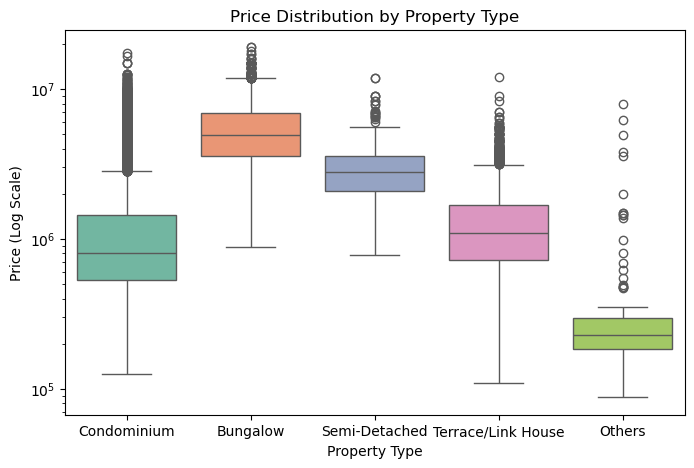

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Property_Simplified',
    y='Price',
    data=df_final,
    hue='Property_Simplified',
    legend=False,               
    palette='Set2'
)
plt.yscale('log')
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (Log Scale)')
plt.show()


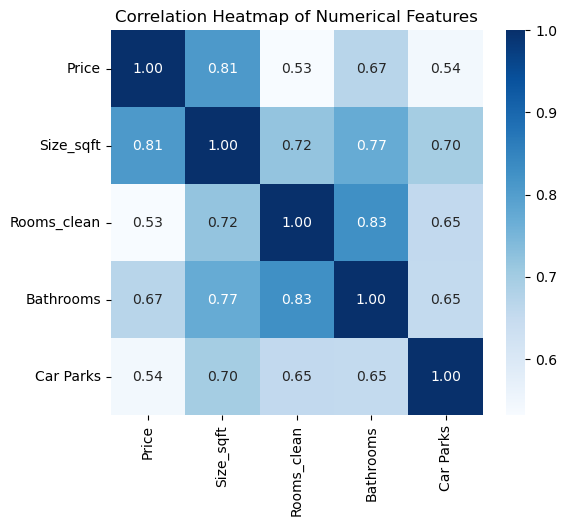

In [77]:
numeric_cols = ['Price', 'Size_sqft', 'Rooms_clean', 'Bathrooms', 'Car Parks']
corr = df_final[numeric_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()




In [79]:
df_model = df_final.copy()

# 1) One-Hot Encoding
df_model = pd.get_dummies(
    df_model,
    columns=['Property_Simplified','Furnishing'],
    drop_first=False
)
df_model.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Rooms_clean,Size_sqft,Price_Million,Property_Simplified_Bungalow,Property_Simplified_Condominium,Property_Simplified_Others,Property_Simplified_Semi-Detached,Property_Simplified_Terrace/Link House,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,Furnishing_Unknown
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",3.0,1335.0,1.25,False,True,False,False,False,True,False,False,False
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",3.0,1875.0,1.03,False,True,False,False,False,False,True,False,False
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",5.0,1513.0,0.90,False,True,False,False,False,False,True,False,False
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,6.0,7200.0,5.35,True,False,False,False,False,False,True,False,False
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,5.0,3600.0,2.60,False,False,False,True,False,False,True,False,False


In [81]:
# Target & ratio features
df_model['log_Price'] = np.log1p(df_model['Price'])
df_model['Price_per_sqft'] = df_final['Price'] / df_final['Size_sqft']
df_model.head(15)

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Rooms_clean,Size_sqft,Price_Million,...,Property_Simplified_Condominium,Property_Simplified_Others,Property_Simplified_Semi-Detached,Property_Simplified_Terrace/Link House,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,Furnishing_Unknown,log_Price,Price_per_sqft
0,"KLCC, Kuala Lumpur",1250000.0,2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",3.0,1335.0,1.250,...,True,False,False,False,True,False,False,False,14.038655,936.329588
2,"Dutamas, Kuala Lumpur",1030000.0,3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",3.0,1875.0,1.030,...,True,False,False,False,False,True,False,False,13.845070,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",5.0,1513.0,0.900,...,True,False,False,False,False,True,False,False,13.710151,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,5.0,4.0,Bungalow,Land area : 7200 sq. ft.,6.0,7200.0,5.350,...,False,False,False,False,False,True,False,False,15.492607,743.055556
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,4.0,4.0,Semi-detached House,Land area : 3600 sq. ft.,5.0,3600.0,2.600,...,False,False,True,False,False,True,False,False,14.771022,722.222222
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000.0,4+1,4.0,3.0,2-sty Terrace/Link House (EndLot),Land area : 25x75 sq. ft.,5.0,1875.0,1.950,...,False,False,False,True,False,True,False,False,14.483340,1040.000000
9,"Sri Petaling, Kuala Lumpur",385000.0,3,2.0,1.0,Apartment (Intermediate),Built-up : 904 sq. ft.,3.0,904.0,0.385,...,True,False,False,False,False,True,False,False,12.861001,425.884956
13,"Taman Tun Dr Ismail, Kuala Lumpur",4580000.0,6+1,5.0,5.0,Bungalow (Intermediate),Land area : 6000 sq. ft.,7.0,6000.0,4.580,...,False,False,False,False,False,True,False,False,15.337210,763.333333
16,"Bukit Tunku (Kenny Hills), Kuala Lumpur",9000000.0,6+1,7.0,4.0,Bungalow (Corner),Land area : 8500 sq. ft.,7.0,8500.0,9.000,...,False,False,False,False,False,True,False,False,16.012735,1058.823529
18,"Mont Kiara, Kuala Lumpur",1780000.0,4+1,4.0,2.0,Condominium (Corner),"Built-up : 1,830 sq. ft.",5.0,1830.0,1.780,...,True,False,False,False,False,True,False,False,14.392124,972.677596


In [83]:
from sklearn.preprocessing import StandardScaler

# Scale numeric predictors
numeric_cols = ['Size_sqft','Rooms_clean','Bathrooms','Car Parks']
scaler = StandardScaler()
df_model[numeric_cols] = scaler.fit_transform(df_model[numeric_cols])

df_model.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Rooms_clean,Size_sqft,Price_Million,...,Property_Simplified_Condominium,Property_Simplified_Others,Property_Simplified_Semi-Detached,Property_Simplified_Terrace/Link House,Furnishing_Fully Furnished,Furnishing_Partly Furnished,Furnishing_Unfurnished,Furnishing_Unknown,log_Price,Price_per_sqft
0,"KLCC, Kuala Lumpur",1250000.0,2+1,0.074962,0.035302,Serviced Residence,"Built-up : 1,335 sq. ft.",-0.366601,-0.333176,1.25,...,True,False,False,False,True,False,False,False,14.038655,936.329588
2,"Dutamas, Kuala Lumpur",1030000.0,3,0.761249,0.035302,Condominium (Corner),"Built-up : 1,875 sq. ft.",-0.366601,0.042048,1.03,...,True,False,False,False,False,True,False,False,13.845070,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000.0,4+1,0.074962,0.035302,Condominium (Corner),"Built-up : 1,513 sq. ft.",1.090979,-0.209491,0.90,...,True,False,False,False,False,True,False,False,13.710151,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000.0,4+2,1.447536,1.792126,Bungalow,Land area : 7200 sq. ft.,1.819770,3.742178,5.35,...,False,False,False,False,False,True,False,False,15.492607,743.055556
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000.0,5,0.761249,1.792126,Semi-detached House,Land area : 3600 sq. ft.,1.090979,1.240682,2.60,...,False,False,True,False,False,True,False,False,14.771022,722.222222


In [95]:
# df_model.to_csv('D:/User Data/Documents/Sem 6 - Machine Learning and Related Applications/kl_house_clean_model.csv', index=False)
# print("Cleaned dataset aved as: kl_house_clean_model.csv")

Cleaned dataset aved as: kl_house_clean_model.csv


In [85]:
# STEP 1: Create a clean copy for regression model
df_Regression = df_model.copy()

# STEP 2: Backup price-related columns separately
price_data = df_Regression[['Price', 'Price_Million', 'log_Price']].copy()

#  STEP 3: Drop messy / unused columns
df_Regression.drop(['Rooms', 'Property Type', 'Size', "Location"], axis=1, inplace=True)

# STEP 4: Define Features (X) and Target (y)
# Use the clean version of data only
X = df_Regression.drop(['Price_Million', 'Price', 'log_Price'], axis=1)
y = df_Regression['Price_Million']

# STEP 5: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 6: Check the shapes
print("Training Samples:", X_train.shape[0])
print("Testing Samples:", X_test.shape[0])
print("\nFeatures used for training:")
print(list(X.columns))

Training Samples: 24843
Testing Samples: 6211

Features used for training:
['Bathrooms', 'Car Parks', 'Rooms_clean', 'Size_sqft', 'Property_Simplified_Bungalow', 'Property_Simplified_Condominium', 'Property_Simplified_Others', 'Property_Simplified_Semi-Detached', 'Property_Simplified_Terrace/Link House', 'Furnishing_Fully Furnished', 'Furnishing_Partly Furnished', 'Furnishing_Unfurnished', 'Furnishing_Unknown', 'Price_per_sqft']


In [87]:
#  STEP 1: Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

#  STEP 2: Create & Train the Model
# ===============================================================
# Create an instance of the Linear Regression model
lr_model = LinearRegression()

# Train (fit) the model using the training data
# X_train → input features, y_train → target (price)
lr_model.fit(X_train, y_train)

#  STEP 3: Make Predictions
# Use the trained model to predict prices on unseen (testing) data
y_pred_lr = lr_model.predict(X_test)

#  STEP 4: Evaluate Model Performance
# Mean Squared Error (MSE): average of squared prediction errors
mse = mean_squared_error(y_test, y_pred_lr)


# Root Mean Squared Error (RMSE): square root of MSE for easier interpretation
rmse = np.sqrt(mse)

# R² (R-squared): measures how well the model explains price variation (0–1)
r2 = r2_score(y_test, y_pred_lr)


#  STEP 5: Display Results
print(" Linear Regression Model Performance:")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

 Linear Regression Model Performance:
MSE: 0.355
RMSE: 0.596
R²: 0.874


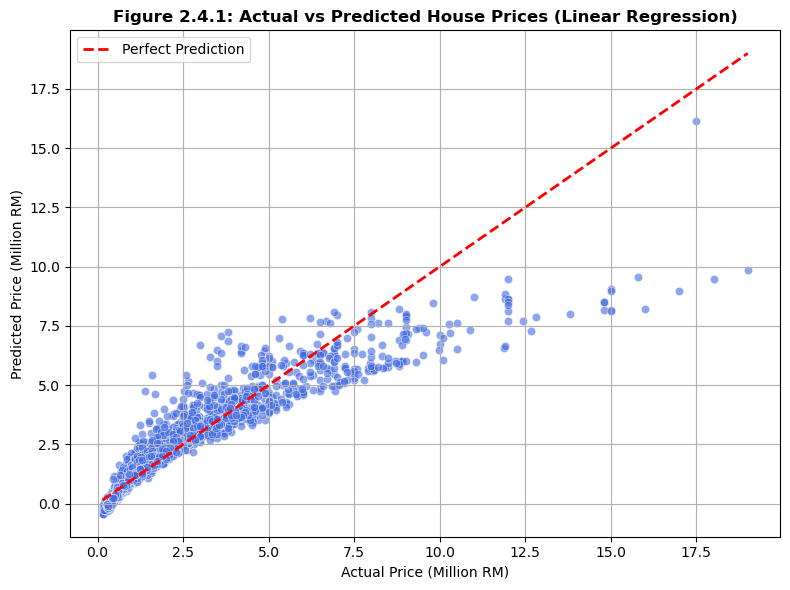

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot comparing actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6, color='royalblue')

# Plot a perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Set titles and labels
plt.title("Figure 2.4.1: Actual vs Predicted House Prices (Linear Regression)", fontsize=12, fontweight='bold')
plt.xlabel("Actual Price (Million RM)")
plt.ylabel("Predicted Price (Million RM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

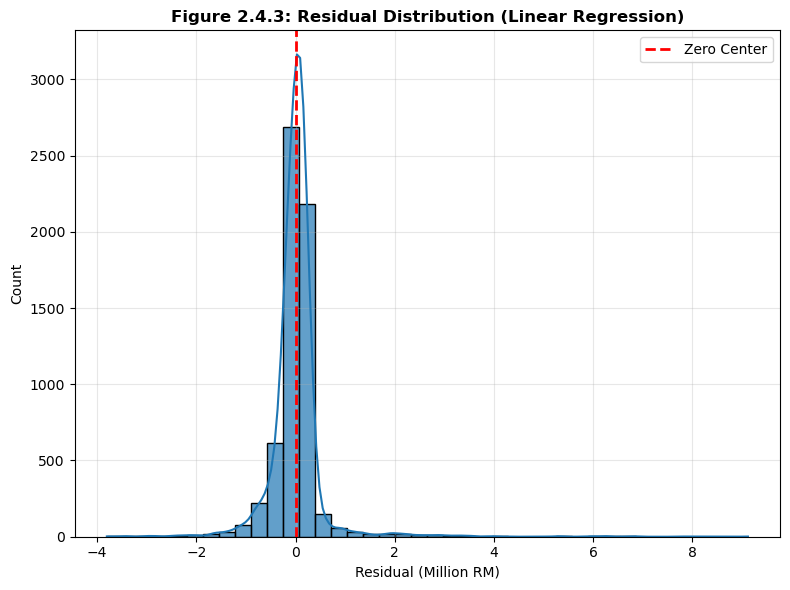

In [91]:
#  Residual Analysis for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) compute residuals
residuals = y_test - y_pred_lr

# 2) residual distribution (should be roughly centered at 0) -residuals (Actual Price − Predicted Price)
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=40, kde=True, alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Center')
plt.title('Figure 2.4.3: Residual Distribution (Linear Regression)', fontsize=12, fontweight='bold')
plt.xlabel('Residual (Million RM)')
plt.ylabel('Count')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [93]:
# STEP 1 – COPY DATASET FOR DNN MODEL

df_DNN = df_model.copy()  # keep your master dataset safe

# Drop columns that are text-based or not needed
df_DNN.drop(['Rooms', 'Property Type', 'Size', 'Location'], axis=1, inplace=True)

# Define X (features) and y (target)
X_dnn = df_DNN.drop(['Price_Million', 'Price', 'log_Price'], axis=1)
y_dnn = df_DNN['Price_Million']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train_dnn, X_test_dnn, y_train_dnn, y_test_dnn = train_test_split(
    X_dnn, y_dnn, test_size=0.2, random_state=42
)

print("DNN Data Prepared")
print("Training samples:", X_train_dnn.shape[0])
print("Testing samples:", X_test_dnn.shape[0])


DNN Data Prepared
Training samples: 24843
Testing samples: 6211


In [95]:
# STEP 2 – BUILD & TRAIN DNN MODEL

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the DNN architecture
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_dnn.shape[1],)), #adjusts learning rate efficiently.
    Dropout(0.2),
    # Layer 2: 64 neurons
    Dense(64, activation='relu'),                                        
    Dense(1)                                                           
])


# Compile the model - tell model how to learn
model_dnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop_dnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history_dnn = model_dnn.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2, 
    epochs=100, 
    batch_size=32,
    callbacks=[early_stop_dnn],
    verbose=1 
)


Epoch 1/100


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1718.6615 - mae: 21.4938 - val_loss: 24.3894 - val_mae: 4.1778
Epoch 2/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step - loss: 30.4260 - mae: 3.7149 - val_loss: 2.0220 - val_mae: 0.7169
Epoch 3/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - loss: 16.3235 - mae: 2.5056 - val_loss: 1.4067 - val_mae: 0.8678
Epoch 4/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 5.1551 - mae: 1.3701 - val_loss: 1.5010 - val_mae: 0.5559
Epoch 5/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 893us/step - loss: 9.0005 - mae: 1.7029 - val_loss: 0.7311 - val_mae: 0.4124
Epoch 6/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - loss: 20.1601 - mae: 2.1296 - val_loss: 1.2110 - val_mae: 0.5048
Epoch 7/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - loss: 2.1857 - mae: 0.8532 - val_loss: 2.4977 - val_mae: 1.1718
Epoch 8/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - loss: 6.2949 - mae: 1.1624 - val_loss: 0.5206 - val_mae: 0.3257
Epoch 9/100
622/622 ━━━━━━━━━━━━━━━━━━

In [97]:
# STEP 3 – EVALUATE PERFORMANCE

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred_dnn = model_dnn.predict(X_test_dnn)

# Compute metrics
mse_dnn = mean_squared_error(y_test_dnn, y_pred_dnn)
rmse_dnn = np.sqrt(mse_dnn)
r2_dnn = r2_score(y_test_dnn, y_pred_dnn)

print(f" Deep Neural Network Model Performance:")
print(f"MSE: {mse_dnn:.3f}")
print(f"RMSE: {rmse_dnn:.3f}")
print(f"R²: {r2_dnn:.3f}")

195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step
 Deep Neural Network Model Performance:
MSE: 0.271
RMSE: 0.521
R²: 0.904


In [45]:
# ============================
# MODEL B – High-Capacity DNN
# ============================

model_dnn_B = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(64, activation='relu'),
    Dense(1)
])

# Different optimizer learning rate
model_dnn_B.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop_B = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_dnn_B = model_dnn_B.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2,
    epochs=120,       # allow deeper model to learn longer
    batch_size=64,    # bigger batch → faster training
    callbacks=[early_stop_B],
    verbose=1
)


Epoch 1/120


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


311/311 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 231.2800 - mae: 8.5370 - val_loss: 1.7145 - val_mae: 0.7337
Epoch 2/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.1503 - mae: 2.0123 - val_loss: 1.7541 - val_mae: 0.9028
Epoch 3/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6695 - mae: 1.3809 - val_loss: 2.4917 - val_mae: 0.8016
Epoch 4/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2260 - mae: 1.1313 - val_loss: 2.0766 - val_mae: 0.7005
Epoch 5/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0691 - mae: 1.0781 - val_loss: 2.0150 - val_mae: 0.6963
Epoch 6/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4035 - mae: 0.9510 - val_loss: 2.0582 - val_mae: 0.7012
Epoch 7/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4002 - mae: 0.9399 - val_loss: 1.9308 - val_mae: 0.6925
Epoch 8/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3538 - mae: 0.9253 - val_loss: 1.7795 - val_mae: 0.7031
Epoch 9/120
311/311 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - los

In [47]:
# ============================
# MODEL C – Lightweight + Low LR
# ============================

from tensorflow.keras.optimizers import Adam

model_dnn_C = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_dnn.shape[1],)),
    Dropout(0.1),

    Dense(32, activation='relu'),
    Dense(1)
])

# Lower learning rate → slower but more stable learning
model_dnn_C.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

early_stop_C = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_dnn_C = model_dnn_C.fit(
    X_train_dnn, y_train_dnn,
    validation_split=0.2,
    epochs=100,
    batch_size=32,   # same as baseline to compare
    callbacks=[early_stop_C],
    verbose=1
)


Epoch 1/100


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


622/622 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 313.6039 - mae: 11.1757 - val_loss: 2.4926 - val_mae: 0.8861
Epoch 2/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - loss: 33.4551 - mae: 3.8029 - val_loss: 1.7833 - val_mae: 0.6329
Epoch 3/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step - loss: 13.6669 - mae: 2.3692 - val_loss: 3.7889 - val_mae: 1.6007
Epoch 4/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step - loss: 8.1144 - mae: 1.7326 - val_loss: 1.4538 - val_mae: 0.8769
Epoch 5/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step - loss: 5.8871 - mae: 1.4355 - val_loss: 1.2430 - val_mae: 0.8048
Epoch 6/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - loss: 2.4929 - mae: 0.9543 - val_loss: 0.9333 - val_mae: 0.4166
Epoch 7/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 2.2020 - mae: 0.8442 - val_loss: 0.7704 - val_mae: 0.5906
Epoch 8/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step - loss: 1.4668 - mae: 0.7326 - val_loss: 0.6599 - val_mae: 0.4999
Epoch 9/100
622/622 ━━━━━━━━━━━━━━━━━━━━ 

In [49]:
print("Model A MAE:", min(history_dnn.history['val_mae']))
print("Model B MAE:", min(history_dnn_B.history['val_mae']))
print("Model C MAE:", min(history_dnn_C.history['val_mae']))

Model A MAE: 0.24092493951320648
Model B MAE: 0.2993611991405487
Model C MAE: 0.12858344614505768


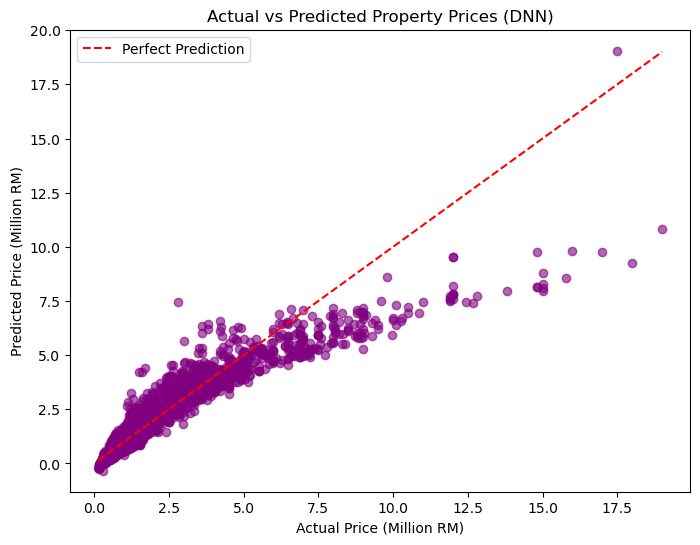

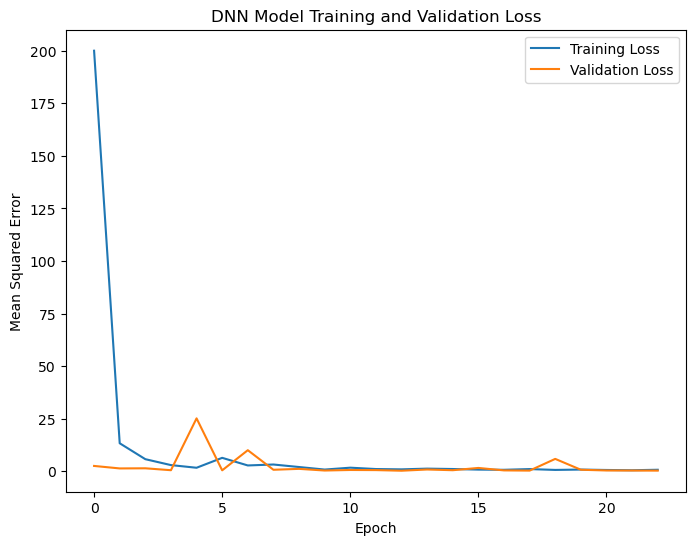

In [107]:
# STEP 4 – VISUALIZATION

# 1️ Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test_dnn, y_pred_dnn, color='purple', alpha=0.6)
plt.plot([y_test_dnn.min(), y_test_dnn.max()],
         [y_test_dnn.min(), y_test_dnn.max()],
         'r--', label='Perfect Prediction')
plt.xlabel('Actual Price (Million RM)')
plt.ylabel('Predicted Price (Million RM)')
plt.title('Actual vs Predicted Property Prices (DNN)')
plt.legend()
plt.show()

# 2️ Training vs Validation Loss
plt.figure(figsize=(8,6))
plt.plot(history_dnn.history['loss'], label='Training Loss')
plt.plot(history_dnn.history['val_loss'], label='Validation Loss')
plt.title('DNN Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [99]:
#  STEP 1: COMPARE MODEL PERFORMANCE (NUMERIC)

import pandas as pd

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Deep Neural Network (DNN)'],
    'MSE': [mse, mse_dnn],
    'RMSE': [rmse, rmse_dnn],
    'R²': [r2, r2_dnn]
})

# Round values for readability
comparison_df = comparison_df.round(3)

# Display table
print("Model Comparison Summary")
display(comparison_df)


Model Comparison Summary


,Model,MSE,RMSE,R²
0,Linear Regression,0.355,0.596,0.874
1,Deep Neural Network (DNN),0.271,0.521,0.904


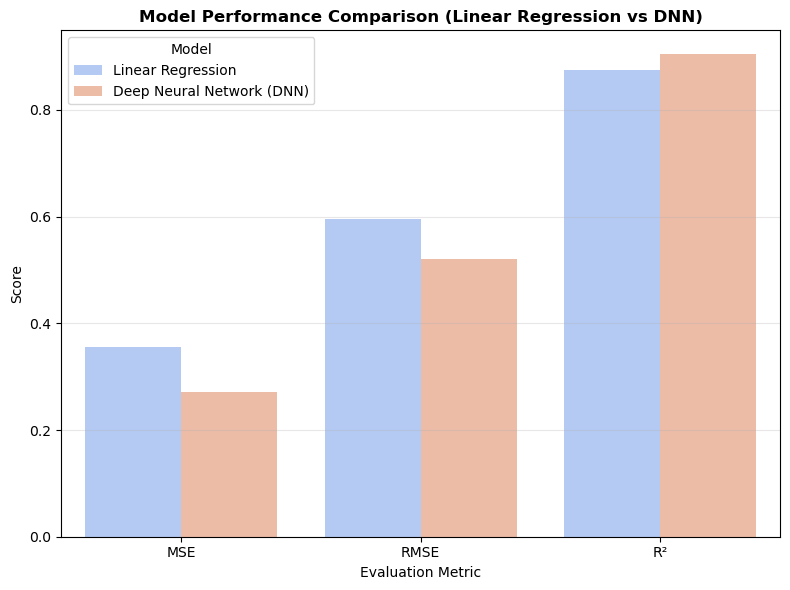

In [107]:
#  STEP 2: VISUAL COMPARISON

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Melt data for easier plotting
comparison_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Create bar plot
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted, palette='coolwarm')

# Add labels and title
plt.title('Model Performance Comparison (Linear Regression vs DNN)', fontsize=12, fontweight='bold')
plt.ylabel('Score')
plt.xlabel('Evaluation Metric')
plt.legend(title='Model')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


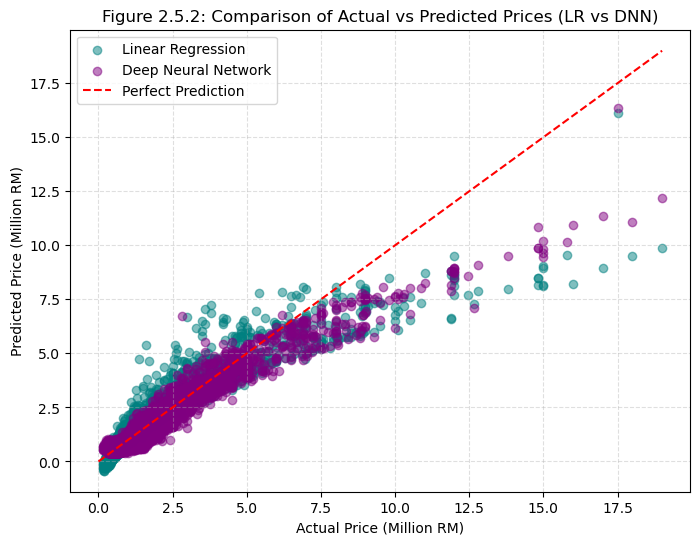

In [103]:
# SCATTER COMPARISON: Actual vs Predicted

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, color='teal', alpha=0.5, label='Linear Regression')
plt.scatter(y_test_dnn, y_pred_dnn, color='purple', alpha=0.5, label='Deep Neural Network')
plt.plot([0, max(y_test.max(), y_test_dnn.max())],
         [0, max(y_test.max(), y_test_dnn.max())],
         'r--', label='Perfect Prediction')

plt.title('Figure 2.5.2: Comparison of Actual vs Predicted Prices (LR vs DNN)')
plt.xlabel('Actual Price (Million RM)')
plt.ylabel('Predicted Price (Million RM)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


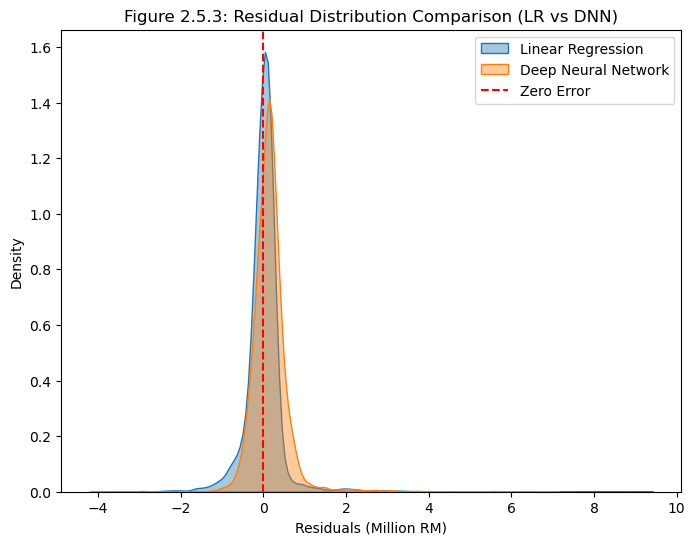

In [105]:
# OPTION 2 – RESIDUAL DISTRIBUTION COMPARISON

import seaborn as sns

residuals_lr = y_test - y_pred_lr
residuals_dnn = y_test_dnn - y_pred_dnn.flatten()

plt.figure(figsize=(8,6))
sns.kdeplot(residuals_lr, label='Linear Regression', fill=True, alpha=0.4)
sns.kdeplot(residuals_dnn, label='Deep Neural Network', fill=True, alpha=0.4)
plt.axvline(0, color='red', linestyle='--', label='Zero Error')
plt.title('Figure 2.5.3: Residual Distribution Comparison (LR vs DNN)')
plt.xlabel('Residuals (Million RM)')
plt.ylabel('Density')
plt.legend()
plt.show()
